# Introduction:

In this project our aim is to predict the class of Student on the basis of his academic details and other factors provided in our dataset

# Outline of the Project: 
<p> <b>1. Basic Details about Dataset: </p>
    
<p> <b>2. Exploratory Data Analysis(EDA): </p>

<p><b>3. Model Building:</p>

<p><b>4. Model Optimisation:</p>
                                 

# Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import *
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from flaml import AutoML
from flaml.ml import sklearn_metric_loss_score
import lazypredict
from lazypredict.Supervised import LazyClassifier

# Read Dataset

In [3]:
df = pd.read_csv(r"D:\Excel files\student's academic performance dataset\xAPI-Edu-Data.csv",delimiter=',')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


# <b><p>Attributes</p></b>
1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion - how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

# Basic Details about Dataset

In [13]:
### Dataset Shape
df.shape

(480, 17)

In [14]:
### Dataset datatypes
df.dtypes

gender                       object
NationalITy                  object
PlaceofBirth                 object
StageID                      object
GradeID                      object
SectionID                    object
Topic                        object
Semester                     object
Relation                     object
raisedhands                 float64
VisITedResources            float64
AnnouncementsView           float64
Discussion                  float64
ParentAnsweringSurvey        object
ParentschoolSatisfaction     object
StudentAbsenceDays           object
Class                        object
dtype: object

In [15]:
### Columns
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [16]:
### Null Values
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [17]:
### Statistical summary of our data
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.00,480.00,480.00,480.00
mean,0.47,0.55,0.39,0.43
std,0.31,0.33,0.27,0.28
min,0.00,0.00,0.00,0.00
25%,0.16,0.20,0.14,0.19
50%,0.50,0.66,0.34,0.39
75%,0.75,0.85,0.59,0.70
max,1.00,1.00,1.00,1.00


In [18]:
df.describe(include='object')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,270,292,289,211


In [19]:
### Renaming nationalIty

df.rename(columns={'NationalITy':'Nationality'},inplace=True)

# EDA

In [20]:
df.head(2)

,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.15,0.16,0.02,0.19,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.20,0.20,0.03,0.24,Yes,Good,Under-7,M


### Seprating Category and numeric columns

In [21]:
### Cat cols
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
print("---------")

## Num Cols

for col2 in df.columns:
    if df[col2].dtype != 'object':
        print(col2)

gender
Nationality
PlaceofBirth
StageID
GradeID
SectionID
Topic
Semester
Relation
ParentAnsweringSurvey
ParentschoolSatisfaction
StudentAbsenceDays
Class
---------
raisedhands
VisITedResources
AnnouncementsView
Discussion


In [22]:
cat = ['gender','Nationality','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays','Class']
numeric = ['raisedhands','VisITedResources','AnnouncementsView','Discussion']

### Univariate Analysis

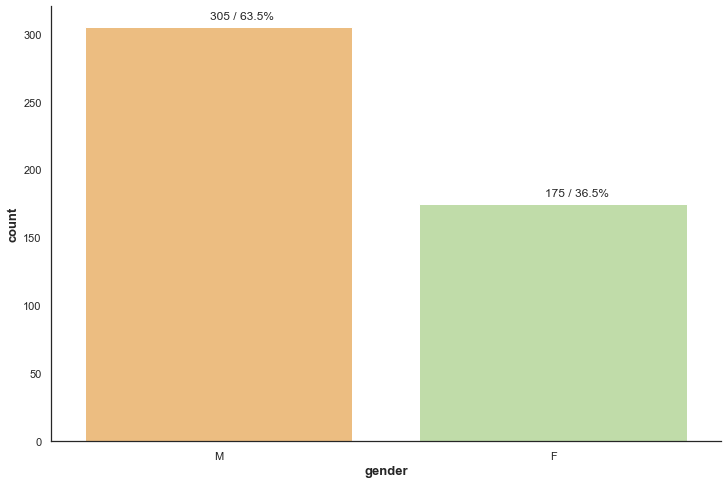

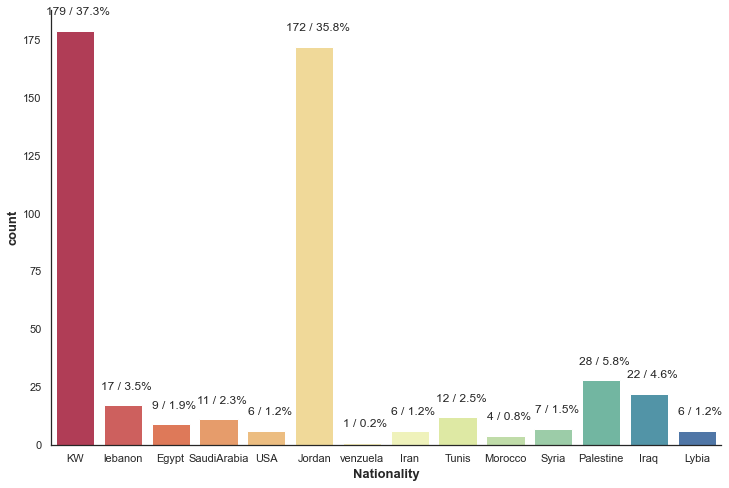

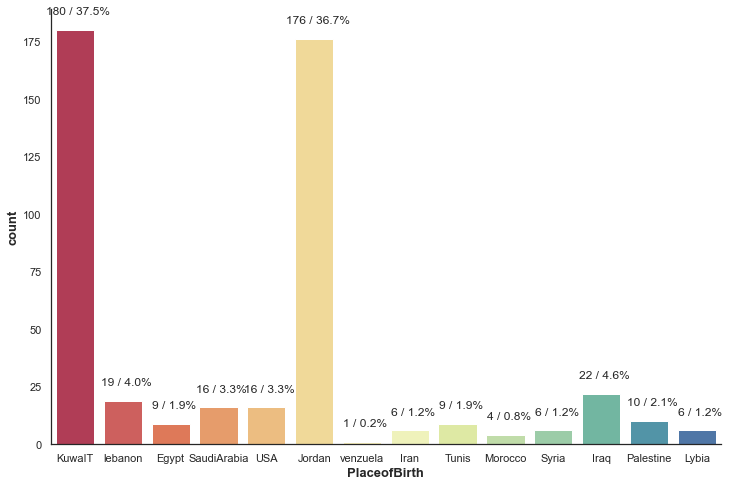

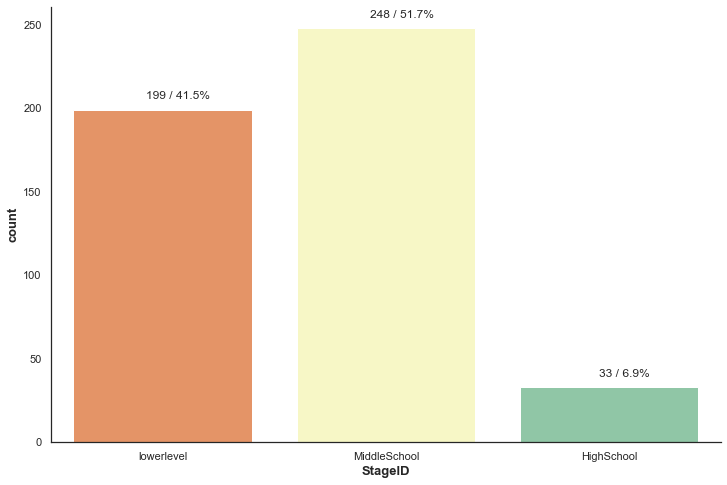

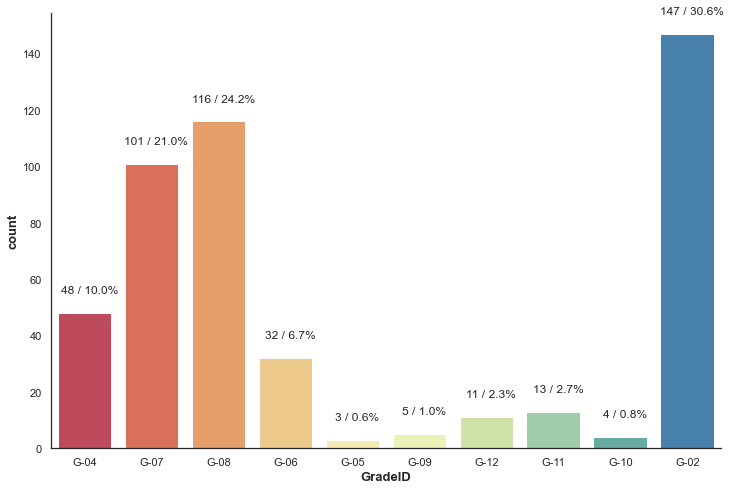

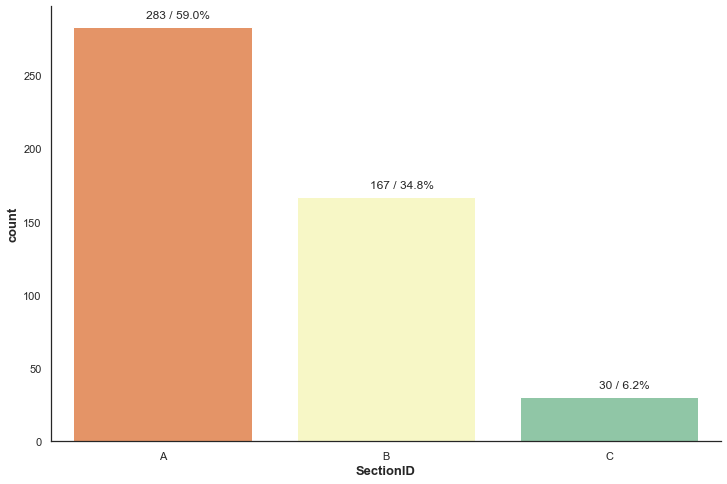

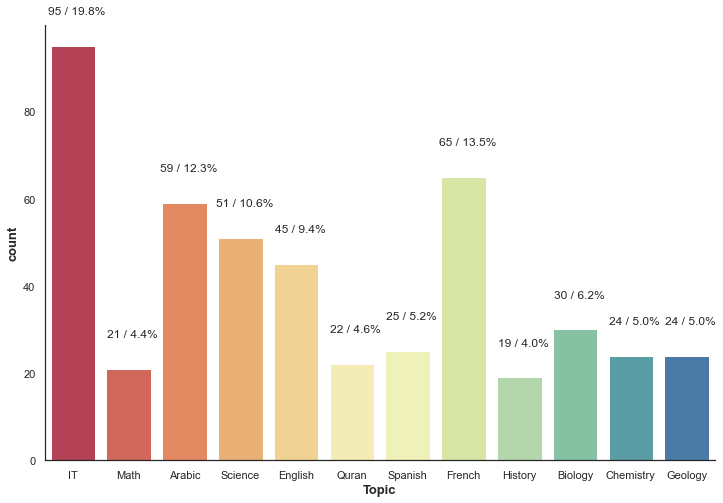

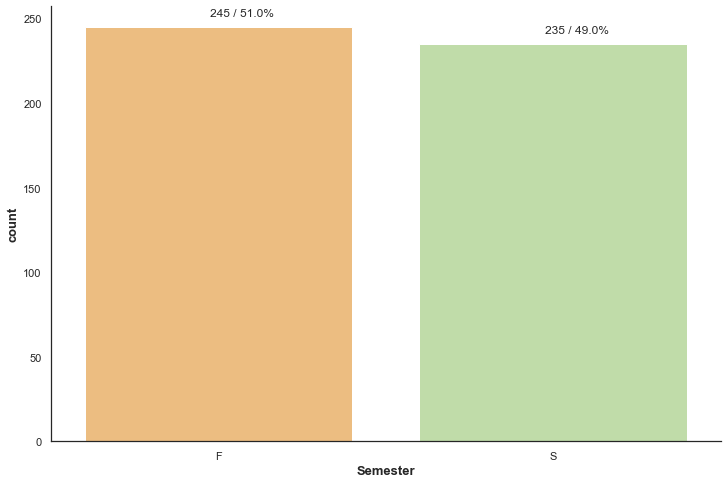

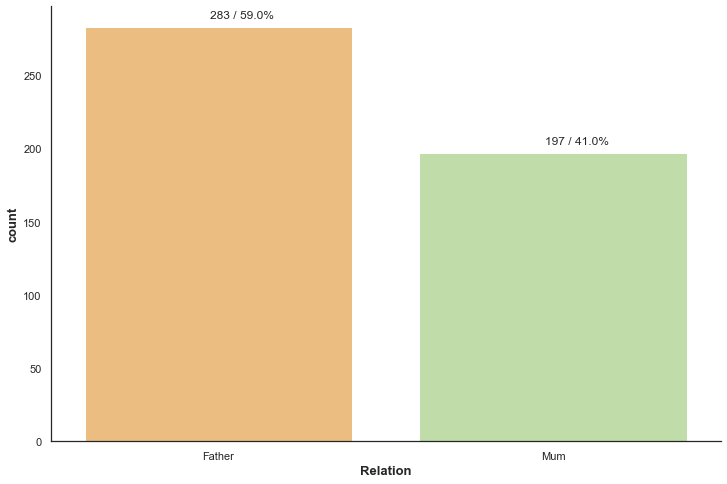

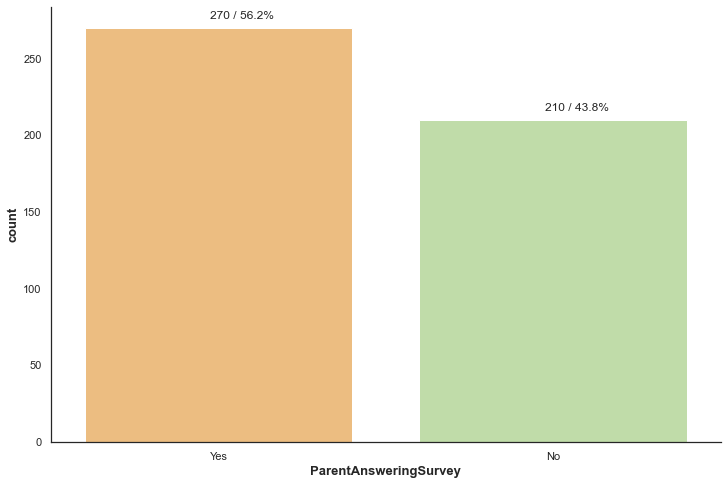

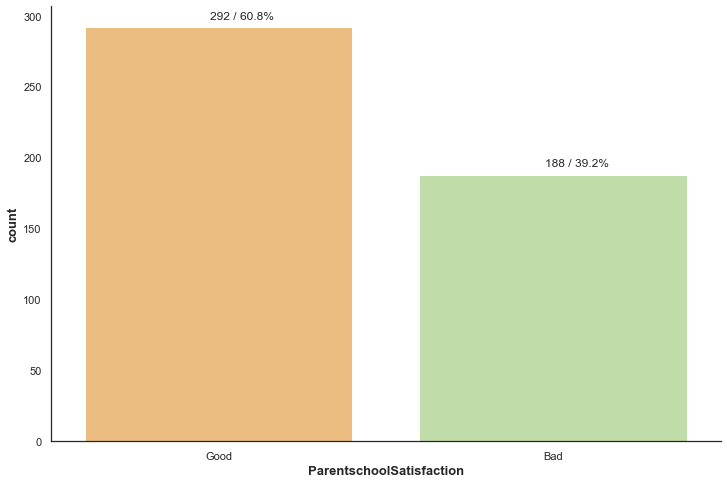

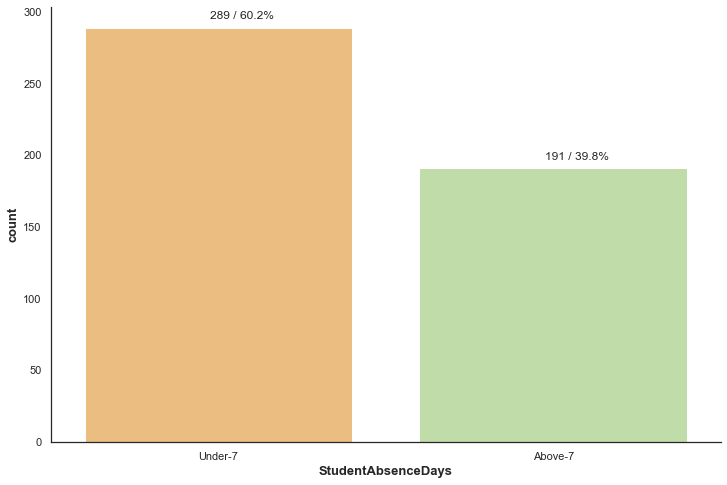

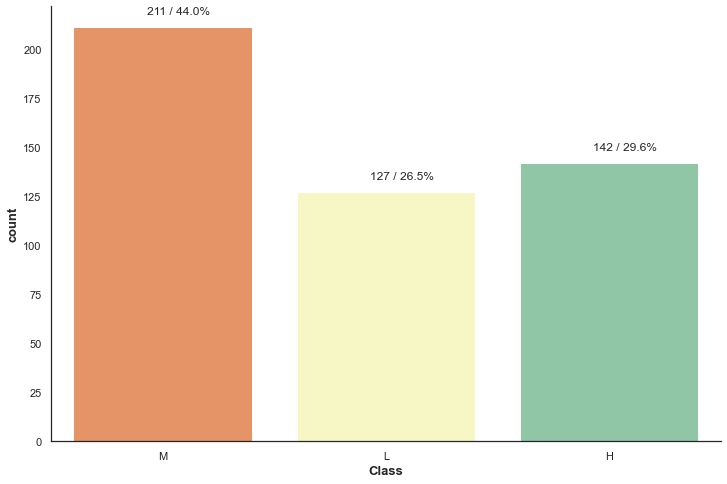

In [23]:
cat = ['gender','Nationality','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays','Class']
for i in cat:
    total_cnt = df[i].count()
    plt.figure(figsize=(12,8))
    
    sns.set(font_scale = 1)
    sns.set_style("white")
    ax = sns.countplot(data=df, x=i ,palette='Spectral')
    for p in ax.patches:
        x, height, width = p.get_x(), p.get_height(), p.get_width()
        ax.text(x + width / 1.7, height + 8, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)
    plt.xlabel(i,fontsize=13,weight='bold')
    plt.ylabel('count',fontsize=13,weight='bold')
   
    sns.despine()

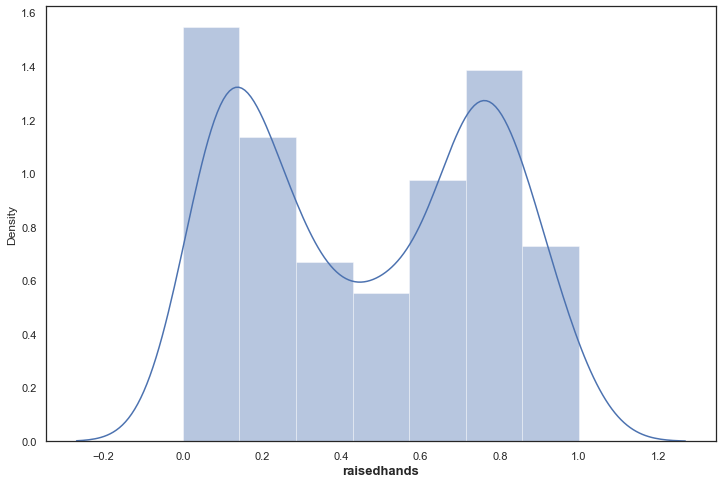

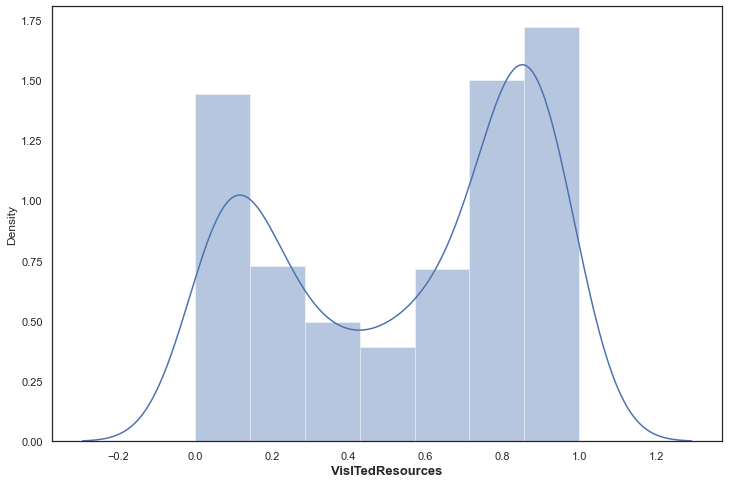

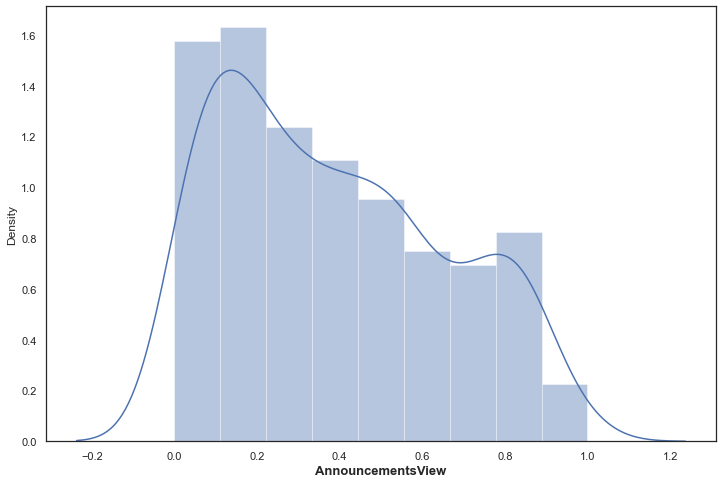

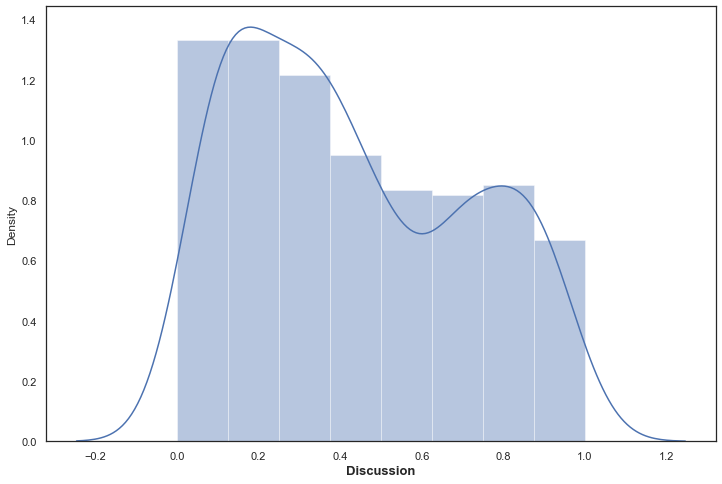

In [24]:
numeric = ['raisedhands','VisITedResources','AnnouncementsView','Discussion']
for i in numeric:

    plt.figure(figsize=(12,8))
    
    sns.set(font_scale = 1)
    sns.set_style("white")
    ax = sns.distplot(df[i])
    plt.xlabel(i,fontsize=13,weight='bold')
   

### Multivariate Analysis

In [25]:
df.head()

,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.15,0.16,0.02,0.19,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.20,0.20,0.03,0.24,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.10,0.07,0.00,0.30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.30,0.25,0.05,0.35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.40,0.51,0.12,0.50,No,Bad,Above-7,M


<AxesSubplot:xlabel='gender', ylabel='count'>

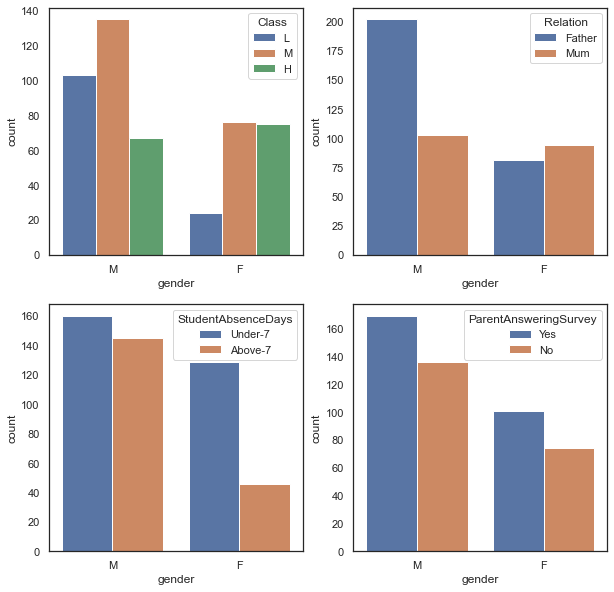

In [26]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=df, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=df, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=df, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=df, ax=axarr[1,1], order=['M','F'])

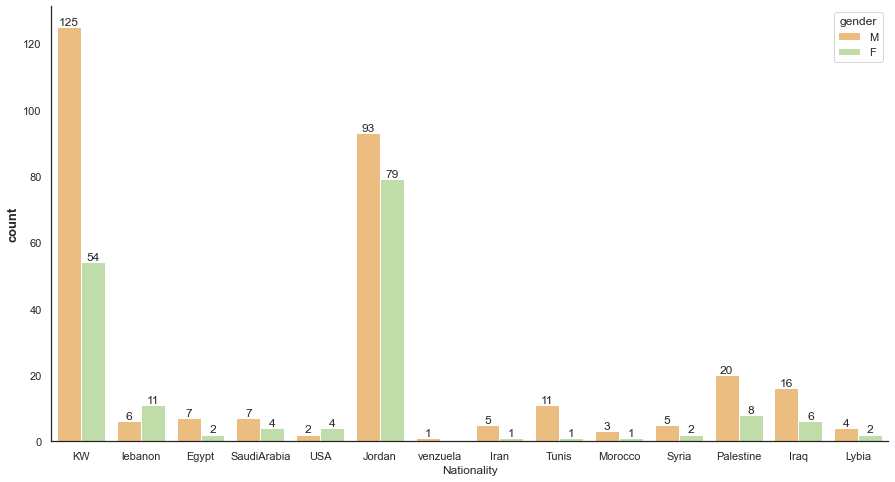

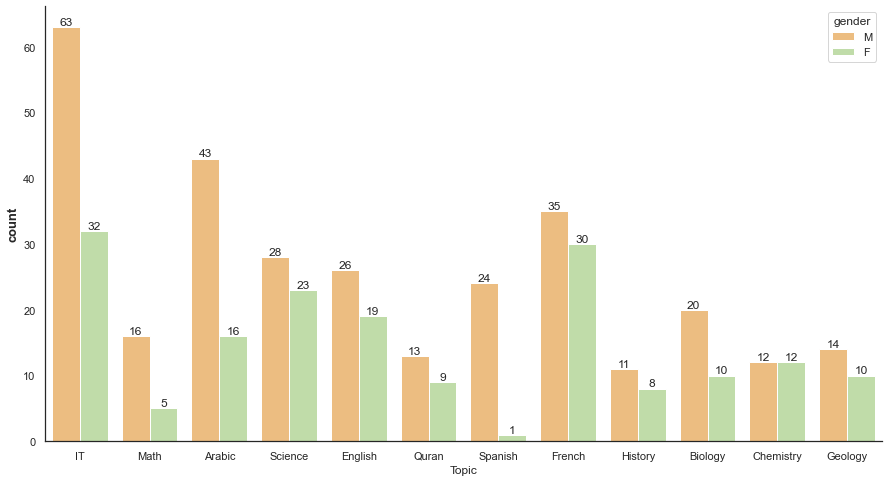

In [27]:
col = ['Nationality','Topic']
for i in col:
    total_cnt = df[i].count()
    plt.figure(figsize=(15,8))
    
    sns.set(font_scale = 1)
    sns.set_style("white")
    ax = sns.countplot(data=df, x=i ,hue='gender',palette='Spectral')
    for container in ax.containers:
        ax.bar_label(container)
    plt.ylabel('count',fontsize=13,weight='bold')
   
    sns.despine()

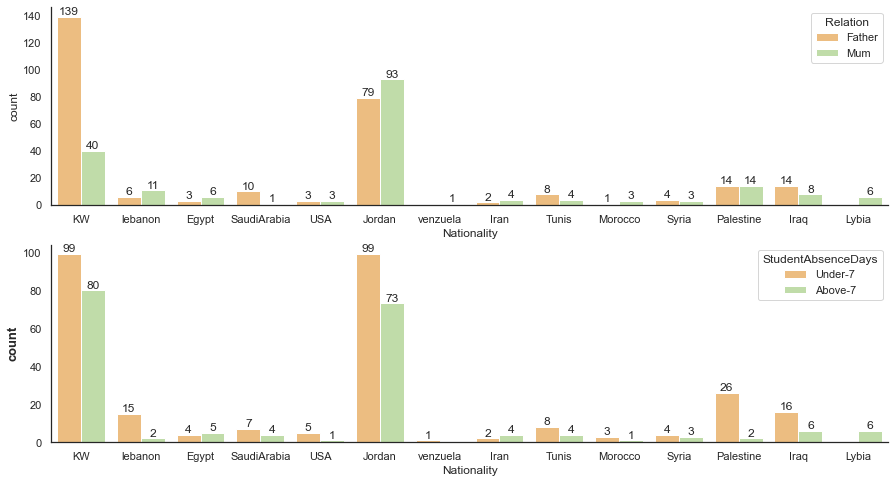

In [28]:
col = ['Nationality']
for i in col:
    fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(15,8))
    
    sns.set(font_scale = 1)
    sns.set_style("white")
    ax1 = sns.countplot(data=df, x=i ,hue='Relation',palette='Spectral',ax=axis1)
    ax2 = sns.countplot(data=df, x=i ,hue='StudentAbsenceDays',palette='Spectral',ax=axis2)
    for container in ax1.containers:
        ax1.bar_label(container)
    for container in ax2.containers:
        ax2.bar_label(container)
    plt.ylabel('count',fontsize=13,weight='bold')
   
    sns.despine()

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

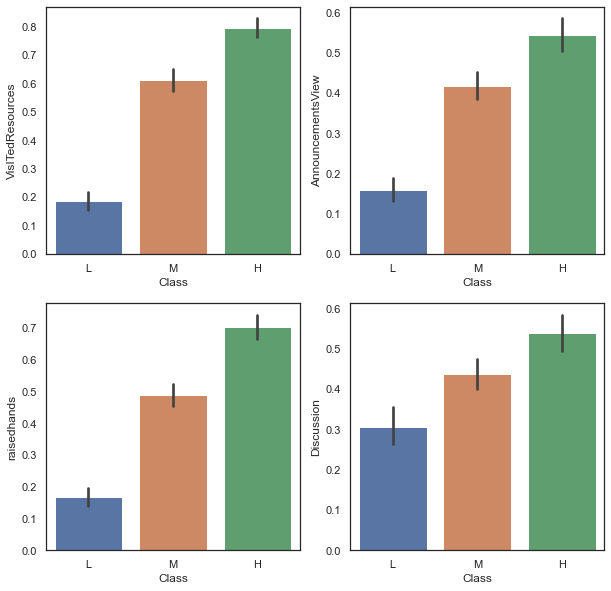

In [29]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

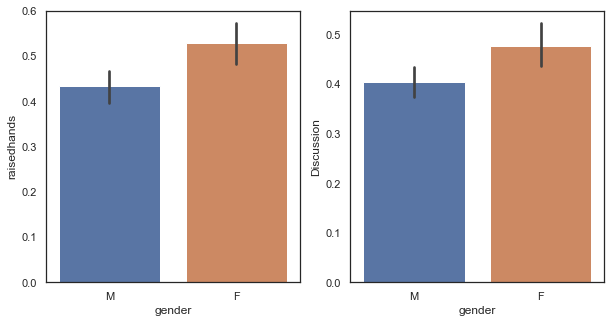

In [30]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='gender', y='raisedhands', data=df, ax=axis1)
sns.barplot(x='gender', y='Discussion', data=df, ax=axis2)

<AxesSubplot:xlabel='gender', ylabel='raisedhands'>

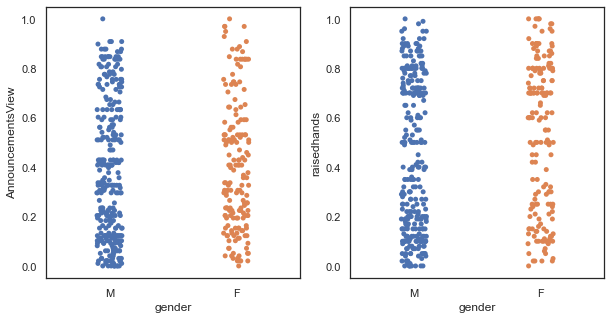

In [31]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.stripplot(x='gender', y='AnnouncementsView', data=df, ax=axis1)
sns.stripplot(x='gender', y='raisedhands', data=df, ax=axis2)

<AxesSubplot:xlabel='Semester', ylabel='AnnouncementsView'>

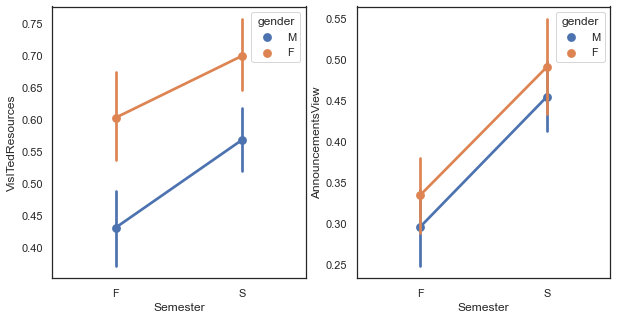

In [32]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=df, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=df, ax=axis2)

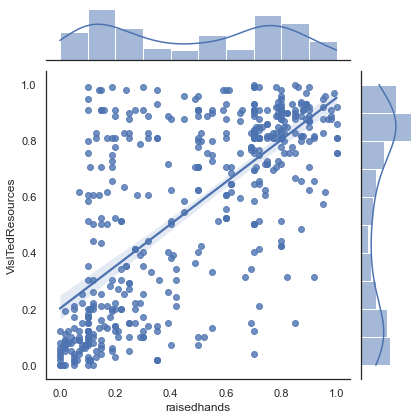

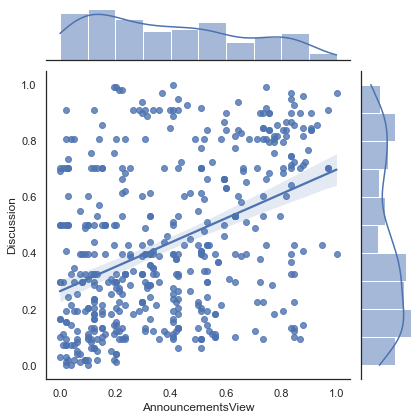

In [33]:
sns.jointplot(x='raisedhands', y='VisITedResources', data=df, ax=axis1,kind='reg')
sns.jointplot(x='AnnouncementsView', y='Discussion', data=df, ax=axis2,kind='reg')

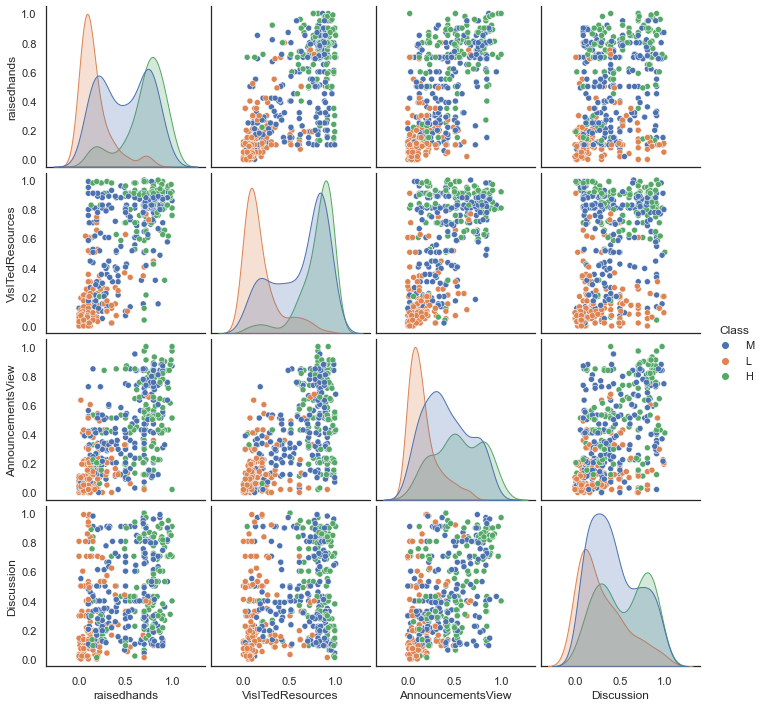

In [34]:
sns.pairplot(df,hue='Class')

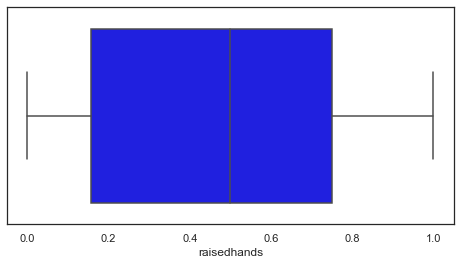

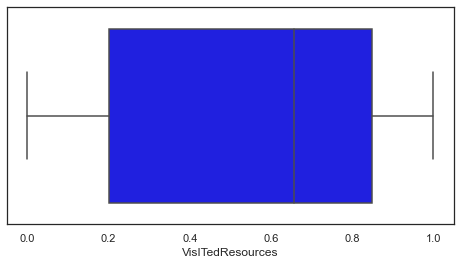

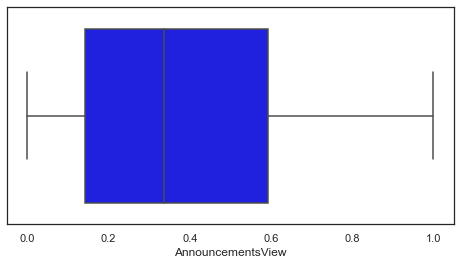

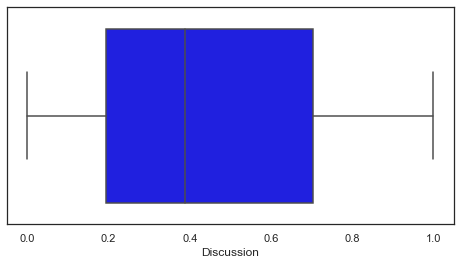

In [35]:
## Outlier Detection
for i in numeric:
    plt.figure(figsize=(8,4))
    sns.boxplot(df[i],color='blue')

## Data Preprocessing

In [36]:
df.head()

,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.15,0.16,0.02,0.19,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.20,0.20,0.03,0.24,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.10,0.07,0.00,0.30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.30,0.25,0.05,0.35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.40,0.51,0.12,0.50,No,Bad,Above-7,M


## Scaling the data

In [37]:
mms = MinMaxScaler()
df[['raisedhands','VisITedResources','AnnouncementsView','Discussion']] = mms.fit_transform(df[['raisedhands','VisITedResources','AnnouncementsView','Discussion']])
df.head()

,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.15,0.16,0.02,0.19,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.20,0.20,0.03,0.24,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.10,0.07,0.00,0.30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.30,0.25,0.05,0.35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,0.40,0.51,0.12,0.50,No,Bad,Above-7,M


## Encoding the data

In [38]:
df = pd.get_dummies(df,columns = ['gender','Nationality','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays'], drop_first = True)
df.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,Nationality_Iran,Nationality_Iraq,Nationality_Jordan,Nationality_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,0.15,0.16,0.02,0.19,M,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,0.20,0.20,0.03,0.24,M,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
2,0.10,0.07,0.00,0.30,L,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.30,0.25,0.05,0.35,L,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0.40,0.51,0.12,0.50,M,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [39]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_M,Nationality_Iran,Nationality_Iraq,Nationality_Jordan,Nationality_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,0.15,0.16,0.02,0.19,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,0.20,0.20,0.03,0.24,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
2,0.10,0.07,0.00,0.30,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.30,0.25,0.05,0.35,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0.40,0.51,0.12,0.50,2,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


## Feature Selection/Importances

In [40]:
X = df.drop('Class', axis=1)
y = df['Class']

In [41]:
select_feature = SelectKBest(chi2).fit(X,y)
df_scores = pd.DataFrame(select_feature.scores_,columns=['Score'])
df_columns = pd.DataFrame(X.columns,columns=['Feature'])

features_rank = pd.concat([df_columns,df_scores],axis=1)
features_rank.sort_values('Score',ascending=False)

,Feature,Score
59,StudentAbsenceDays_Under-7,89.61
56,Relation_Mum,47.97
1,VisITedResources,47.48
57,ParentAnsweringSurvey_Yes,41.72
0,raisedhands,41.25
58,ParentschoolSatisfaction_Good,26.82
2,AnnouncementsView,26.72
22,PlaceofBirth_Lybia,16.68
9,Nationality_Lybia,16.68
21,PlaceofBirth_KuwaIT,15.97


In [42]:
len(features_rank)

60

In First Attempt we will build all our Models with all the features

## Model Building

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import *
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from flaml import AutoML
from flaml.ml import sklearn_metric_loss_score
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [38]:
def modeling(Model,Xtrain=X_train,Xtest=X_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model()
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    

    # Predicting the Test set results
    y_pred_test = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain)
    
    
    print(classification_report(y_test, y_pred_test))
    print ('Testing accuracy',accuracy_score(y_test, y_pred_test))
    print ('Training accuracy',accuracy_score(y_train, y_pred_train))
  
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred_test), rownames=['Actual'], colnames=['Predictions']).astype(int)
    plt.figure(figsize = (8,8))

    '''
    cmapGR = LinearSegmentedColormap.from_list(
        name='test', 
        colors=['red','green']
    )
    '''
    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 

#                                                         Models

## Base Models

## 1.Logistic Regression

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        39
           1       0.88      0.67      0.76        21
           2       0.65      0.86      0.74        36

    accuracy                           0.77        96
   macro avg       0.81      0.76      0.77        96
weighted avg       0.80      0.77      0.77        96

Testing accuracy 0.7708333333333334
Training accuracy 0.8515625


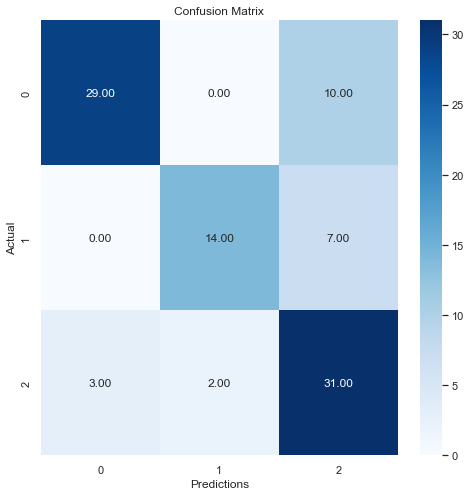

In [39]:
modeling(LogisticRegression)

## 2.KNN

              precision    recall  f1-score   support

           0       0.75      0.62      0.68        39
           1       0.80      0.76      0.78        21
           2       0.55      0.67      0.60        36

    accuracy                           0.67        96
   macro avg       0.70      0.68      0.69        96
weighted avg       0.68      0.67      0.67        96

Testing accuracy 0.6666666666666666
Training accuracy 0.7786458333333334


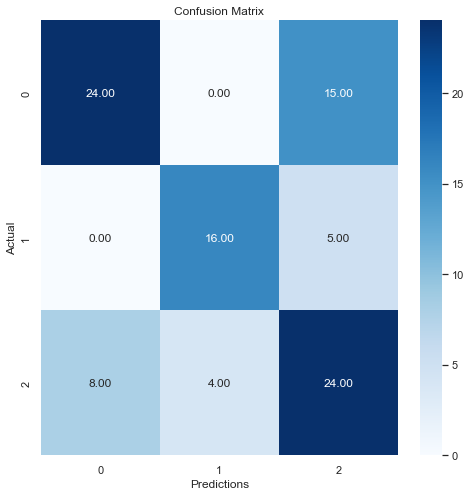

In [40]:
modeling(KNeighborsClassifier)

## 3.Decision Tree

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        39
           1       0.82      0.67      0.74        21
           2       0.63      0.75      0.68        36

    accuracy                           0.73        96
   macro avg       0.75      0.72      0.73        96
weighted avg       0.74      0.73      0.73        96

Testing accuracy 0.7291666666666666
Training accuracy 1.0


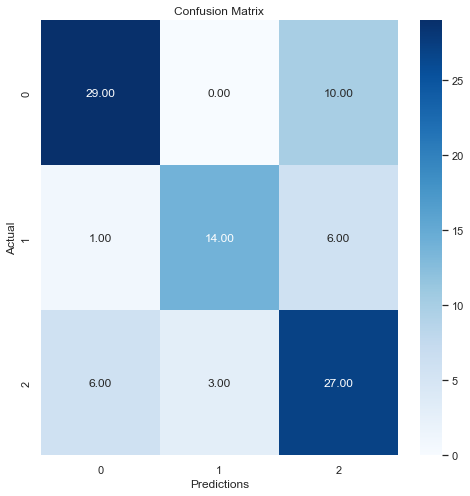

In [41]:
modeling(DecisionTreeClassifier)

 Overfit

## 4.SVM

              precision    recall  f1-score   support

           0       0.87      0.67      0.75        39
           1       0.94      0.76      0.84        21
           2       0.63      0.86      0.73        36

    accuracy                           0.76        96
   macro avg       0.81      0.76      0.78        96
weighted avg       0.80      0.76      0.76        96

Testing accuracy 0.7604166666666666
Training accuracy 0.8723958333333334


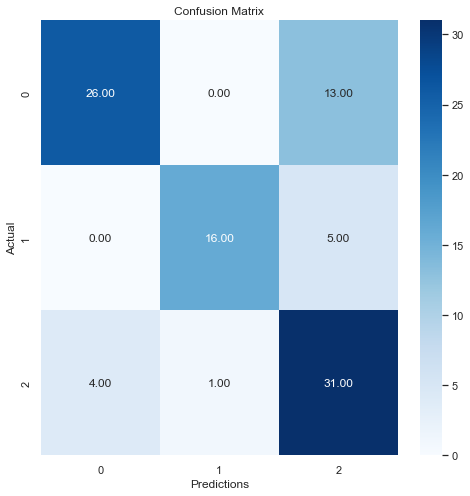

In [42]:
modeling(SVC)

## 5.Naive Bayes

              precision    recall  f1-score   support

           0       0.72      0.46      0.56        39
           1       0.76      0.62      0.68        21
           2       0.46      0.69      0.56        36

    accuracy                           0.58        96
   macro avg       0.65      0.59      0.60        96
weighted avg       0.63      0.58      0.59        96

Testing accuracy 0.5833333333333334
Training accuracy 0.6927083333333334


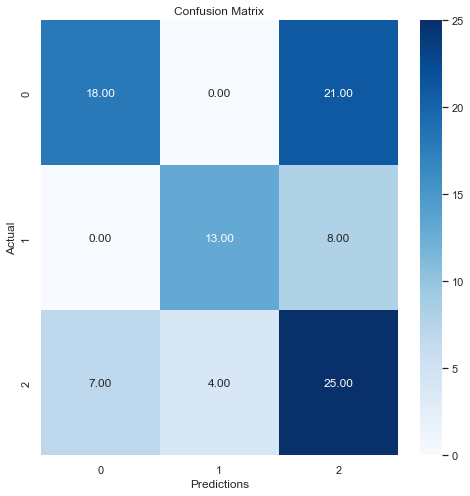

In [43]:
modeling(MultinomialNB)

## 6.Random Forest

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        39
           1       0.89      0.76      0.82        21
           2       0.66      0.86      0.75        36

    accuracy                           0.78        96
   macro avg       0.82      0.78      0.79        96
weighted avg       0.81      0.78      0.78        96

Testing accuracy 0.78125
Training accuracy 1.0


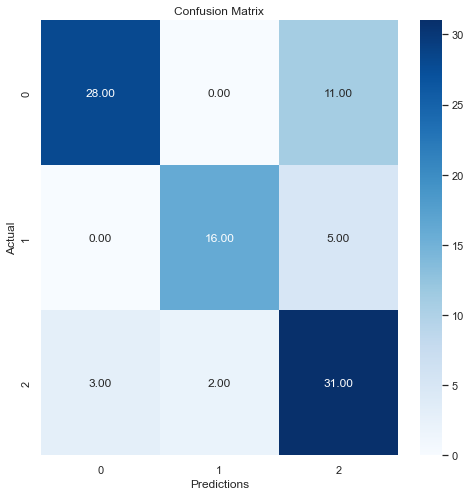

In [44]:
modeling(RandomForestClassifier)

## 7.Gradientboosting

              precision    recall  f1-score   support

           0       0.90      0.67      0.76        39
           1       0.88      0.67      0.76        21
           2       0.61      0.86      0.71        36

    accuracy                           0.74        96
   macro avg       0.79      0.73      0.74        96
weighted avg       0.78      0.74      0.74        96

Testing accuracy 0.7395833333333334
Training accuracy 0.9895833333333334


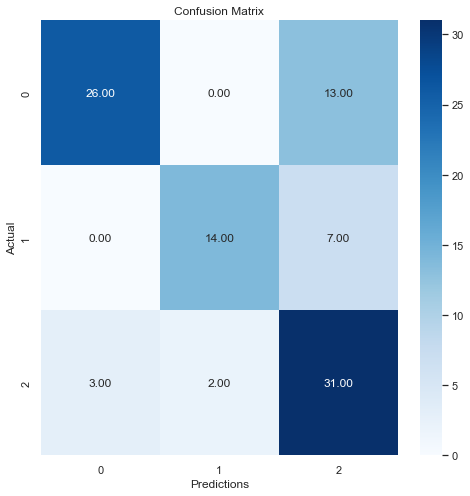

In [45]:
modeling(GradientBoostingClassifier)

## 8.XGBoost

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        39
           1       0.88      0.67      0.76        21
           2       0.60      0.81      0.69        36

    accuracy                           0.73        96
   macro avg       0.77      0.72      0.74        96
weighted avg       0.76      0.73      0.73        96

Testing accuracy 0.7291666666666666
Training accuracy 1.0


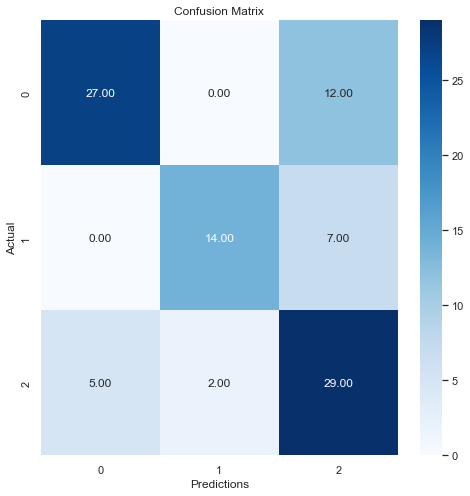

In [46]:
modeling(XGBClassifier)

## 9.Adaboost

              precision    recall  f1-score   support

           0       0.76      0.64      0.69        39
           1       1.00      0.57      0.73        21
           2       0.55      0.78      0.64        36

    accuracy                           0.68        96
   macro avg       0.77      0.66      0.69        96
weighted avg       0.73      0.68      0.68        96

Testing accuracy 0.6770833333333334
Training accuracy 0.7369791666666666


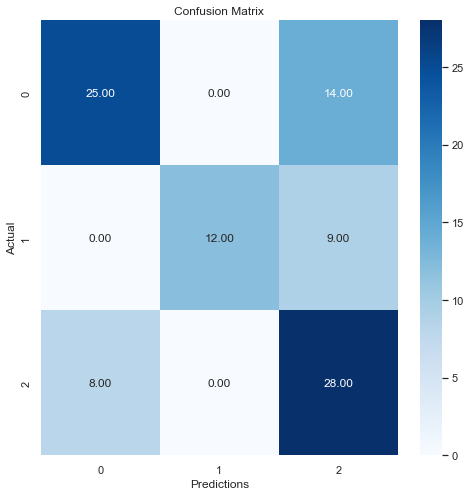

In [47]:
modeling(AdaBoostClassifier)

## 10.Catboost

In [49]:
from catboost import CatBoostClassifier
modeling(CatBoostClassifier)

Learning rate set to 0.075357
0:	learn: 1.0544950	total: 253ms	remaining: 4m 13s
1:	learn: 1.0126852	total: 255ms	remaining: 2m 7s
2:	learn: 0.9723578	total: 257ms	remaining: 1m 25s
3:	learn: 0.9369557	total: 258ms	remaining: 1m 4s
4:	learn: 0.9109050	total: 260ms	remaining: 51.7s
5:	learn: 0.8819805	total: 261ms	remaining: 43.3s
6:	learn: 0.8565596	total: 262ms	remaining: 37.2s
7:	learn: 0.8333101	total: 264ms	remaining: 32.7s
8:	learn: 0.8097456	total: 266ms	remaining: 29.2s
9:	learn: 0.7928005	total: 267ms	remaining: 26.4s
10:	learn: 0.7736994	total: 269ms	remaining: 24.1s
11:	learn: 0.7543173	total: 270ms	remaining: 22.2s
12:	learn: 0.7354220	total: 272ms	remaining: 20.6s
13:	learn: 0.7189090	total: 273ms	remaining: 19.2s
14:	learn: 0.7039325	total: 275ms	remaining: 18s
15:	learn: 0.6904661	total: 276ms	remaining: 17s
16:	learn: 0.6768780	total: 277ms	remaining: 16s
17:	learn: 0.6647786	total: 279ms	remaining: 15.2s
18:	learn: 0.6531212	total: 280ms	remaining: 14.5s
19:	learn: 0.64

228:	learn: 0.1836588	total: 590ms	remaining: 1.99s
229:	learn: 0.1830870	total: 592ms	remaining: 1.98s
230:	learn: 0.1821924	total: 593ms	remaining: 1.97s
231:	learn: 0.1815079	total: 595ms	remaining: 1.97s
232:	learn: 0.1804655	total: 596ms	remaining: 1.96s
233:	learn: 0.1796236	total: 597ms	remaining: 1.96s
234:	learn: 0.1790884	total: 599ms	remaining: 1.95s
235:	learn: 0.1780893	total: 601ms	remaining: 1.94s
236:	learn: 0.1773446	total: 602ms	remaining: 1.94s
237:	learn: 0.1768022	total: 604ms	remaining: 1.93s
238:	learn: 0.1759887	total: 606ms	remaining: 1.93s
239:	learn: 0.1751316	total: 607ms	remaining: 1.92s
240:	learn: 0.1745052	total: 609ms	remaining: 1.92s
241:	learn: 0.1732396	total: 610ms	remaining: 1.91s
242:	learn: 0.1726887	total: 612ms	remaining: 1.91s
243:	learn: 0.1716222	total: 613ms	remaining: 1.9s
244:	learn: 0.1708216	total: 615ms	remaining: 1.89s
245:	learn: 0.1703347	total: 616ms	remaining: 1.89s
246:	learn: 0.1700311	total: 618ms	remaining: 1.88s
247:	learn: 0

468:	learn: 0.0917085	total: 946ms	remaining: 1.07s
469:	learn: 0.0913168	total: 947ms	remaining: 1.07s
470:	learn: 0.0911739	total: 949ms	remaining: 1.06s
471:	learn: 0.0909627	total: 950ms	remaining: 1.06s
472:	learn: 0.0908602	total: 952ms	remaining: 1.06s
473:	learn: 0.0904986	total: 953ms	remaining: 1.06s
474:	learn: 0.0903413	total: 955ms	remaining: 1.05s
475:	learn: 0.0901578	total: 956ms	remaining: 1.05s
476:	learn: 0.0899617	total: 957ms	remaining: 1.05s
477:	learn: 0.0898671	total: 959ms	remaining: 1.05s
478:	learn: 0.0897189	total: 960ms	remaining: 1.04s
479:	learn: 0.0894862	total: 962ms	remaining: 1.04s
480:	learn: 0.0892645	total: 964ms	remaining: 1.04s
481:	learn: 0.0890589	total: 965ms	remaining: 1.04s
482:	learn: 0.0888293	total: 967ms	remaining: 1.03s
483:	learn: 0.0886279	total: 968ms	remaining: 1.03s
484:	learn: 0.0883591	total: 970ms	remaining: 1.03s
485:	learn: 0.0881456	total: 972ms	remaining: 1.03s
486:	learn: 0.0879561	total: 973ms	remaining: 1.02s
487:	learn: 

717:	learn: 0.0559038	total: 1.3s	remaining: 510ms
718:	learn: 0.0558355	total: 1.3s	remaining: 508ms
719:	learn: 0.0557424	total: 1.3s	remaining: 506ms
720:	learn: 0.0556729	total: 1.3s	remaining: 504ms
721:	learn: 0.0555520	total: 1.3s	remaining: 502ms
722:	learn: 0.0554554	total: 1.31s	remaining: 501ms
723:	learn: 0.0553887	total: 1.31s	remaining: 499ms
724:	learn: 0.0553296	total: 1.31s	remaining: 497ms
725:	learn: 0.0552104	total: 1.31s	remaining: 495ms
726:	learn: 0.0551300	total: 1.31s	remaining: 493ms
727:	learn: 0.0550548	total: 1.31s	remaining: 491ms
728:	learn: 0.0549802	total: 1.31s	remaining: 489ms
729:	learn: 0.0549173	total: 1.32s	remaining: 487ms
730:	learn: 0.0548713	total: 1.32s	remaining: 485ms
731:	learn: 0.0547298	total: 1.32s	remaining: 483ms
732:	learn: 0.0546534	total: 1.32s	remaining: 481ms
733:	learn: 0.0545573	total: 1.32s	remaining: 479ms
734:	learn: 0.0544874	total: 1.32s	remaining: 477ms
735:	learn: 0.0543936	total: 1.32s	remaining: 475ms
736:	learn: 0.054

954:	learn: 0.0386756	total: 1.64s	remaining: 77.4ms
955:	learn: 0.0386381	total: 1.64s	remaining: 75.7ms
956:	learn: 0.0385829	total: 1.65s	remaining: 73.9ms
957:	learn: 0.0385057	total: 1.65s	remaining: 72.2ms
958:	learn: 0.0384512	total: 1.65s	remaining: 70.5ms
959:	learn: 0.0384053	total: 1.65s	remaining: 68.8ms
960:	learn: 0.0383546	total: 1.65s	remaining: 67ms
961:	learn: 0.0383205	total: 1.65s	remaining: 65.3ms
962:	learn: 0.0382788	total: 1.65s	remaining: 63.6ms
963:	learn: 0.0381762	total: 1.66s	remaining: 61.8ms
964:	learn: 0.0381359	total: 1.66s	remaining: 60.1ms
965:	learn: 0.0380639	total: 1.66s	remaining: 58.4ms
966:	learn: 0.0380008	total: 1.66s	remaining: 56.7ms
967:	learn: 0.0379507	total: 1.66s	remaining: 55ms
968:	learn: 0.0378892	total: 1.66s	remaining: 53.2ms
969:	learn: 0.0378719	total: 1.67s	remaining: 51.5ms
970:	learn: 0.0378237	total: 1.67s	remaining: 49.8ms
971:	learn: 0.0377773	total: 1.67s	remaining: 48.1ms
972:	learn: 0.0377219	total: 1.67s	remaining: 46.3

AssertionError: arrays and names must have the same length

## 11.Extra Tree

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        39
           1       0.90      0.86      0.88        21
           2       0.74      0.86      0.79        36

    accuracy                           0.83        96
   macro avg       0.85      0.84      0.84        96
weighted avg       0.84      0.83      0.84        96

Testing accuracy 0.8333333333333334
Training accuracy 1.0


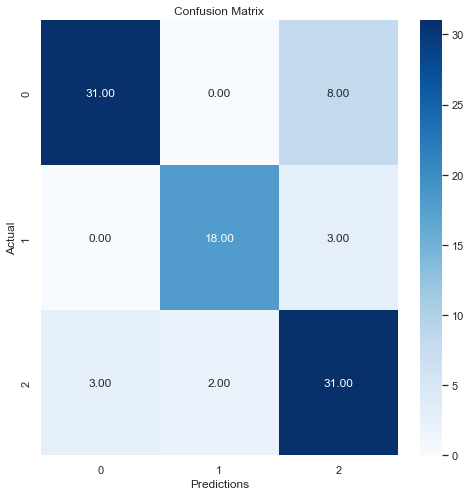

In [51]:
modeling(ExtraTreesClassifier)

## 12.LGBM

              precision    recall  f1-score   support

           0       0.87      0.67      0.75        39
           1       0.94      0.71      0.81        21
           2       0.62      0.86      0.72        36

    accuracy                           0.75        96
   macro avg       0.81      0.75      0.76        96
weighted avg       0.79      0.75      0.75        96

Testing accuracy 0.75
Training accuracy 1.0


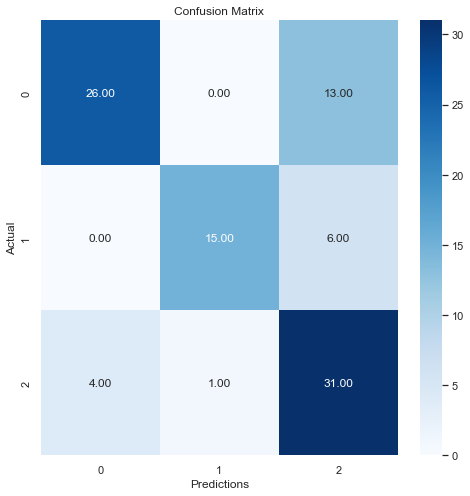

In [52]:
modeling(LGBMClassifier)

## 13.Hist Gradient

              precision    recall  f1-score   support

           0       0.83      0.64      0.72        39
           1       1.00      0.71      0.83        21
           2       0.61      0.86      0.71        36

    accuracy                           0.74        96
   macro avg       0.81      0.74      0.76        96
weighted avg       0.79      0.74      0.74        96

Testing accuracy 0.7395833333333334
Training accuracy 1.0


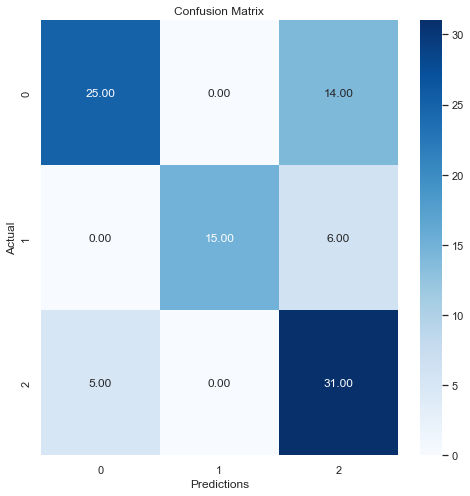

In [54]:
modeling(HistGradientBoostingClassifier)

## Optimising Extra Tree Classifier

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
import sklearn

In [67]:
import optuna
def objective(trial):

        criterion = trial.suggest_categorical('criterion', ["gini", "entropy", "log_loss"])
        n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
        max_depth = trial.suggest_int('max_depth', 10, 200,10)
        min_samples_split = trial.suggest_int('min_samples_split', 2,10)
        max_features = trial.suggest_categorical('max_features', ["sqrt", "log2"])
        min_weight_fraction_leaf = trial.suggest_discrete_uniform('min_weight_fraction_leaf',0.0,0.5, 0.1)

        clf = sklearn.ensemble.ExtraTreesClassifier(criterion=criterion,min_samples_split=min_samples_split,max_features=max_features,
            n_estimators=n_estimators,max_depth=max_depth,min_weight_fraction_leaf=min_weight_fraction_leaf,random_state=12)
   

        return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=5).mean()


In [68]:
%%time
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=120)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-10-06 23:59:19,709] A new study created in memory with name: no-name-2abf98e3-6399-4f4a-b5d9-444e41b6da27
[I 2022-10-06 23:59:21,053] Trial 0 finished with value: 0.6902255639097745 and parameters: {'criterion': 'entropy', 'n_estimators': 870, 'max_depth': 10, 'min_samples_split': 3, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.1}. Best is trial 0 with value: 0.6902255639097745.
[I 2022-10-06 23:59:25,145] Trial 1 finished with value: 0.5911141490088858 and parameters: {'criterion': 'entropy', 'n_estimators': 1530, 'max_depth': 200, 'min_samples_split': 6, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.1}. Best is trial 0 with value: 0.6902255639097745.
[I 2022-10-06 23:59:26,949] Trial 2 finished with value: 0.6901913875598087 and parameters: {'criterion': 'entropy', 'n_estimators': 640, 'max_depth': 10, 'min_samples_split': 9, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.1}. Best is trial 0 with value: 0.6902255639097745.
[I 2022-10-06 23:59:27,725] T

[I 2022-10-07 00:01:06,763] Trial 27 finished with value: 0.5078263841421736 and parameters: {'criterion': 'log_loss', 'n_estimators': 1920, 'max_depth': 140, 'min_samples_split': 3, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.2}. Best is trial 10 with value: 0.7865003417634997.
[I 2022-10-07 00:01:12,206] Trial 28 finished with value: 0.7865003417634997 and parameters: {'criterion': 'gini', 'n_estimators': 1820, 'max_depth': 140, 'min_samples_split': 6, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.0}. Best is trial 10 with value: 0.7865003417634997.
[I 2022-10-07 00:01:16,682] Trial 29 finished with value: 0.6876281613123718 and parameters: {'criterion': 'gini', 'n_estimators': 1830, 'max_depth': 140, 'min_samples_split': 6, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.1}. Best is trial 10 with value: 0.7865003417634997.
[I 2022-10-07 00:01:17,297] Trial 30 finished with value: 0.5807587149692413 and parameters: {'criterion': 'gini', 'n_estimators': 210, 'm

[I 2022-10-07 00:02:59,660] Trial 55 finished with value: 0.791695146958305 and parameters: {'criterion': 'gini', 'n_estimators': 1350, 'max_depth': 90, 'min_samples_split': 6, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.0}. Best is trial 53 with value: 0.791695146958305.
[I 2022-10-07 00:03:04,142] Trial 56 finished with value: 0.786466165413534 and parameters: {'criterion': 'gini', 'n_estimators': 1490, 'max_depth': 90, 'min_samples_split': 8, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.0}. Best is trial 53 with value: 0.791695146958305.
[I 2022-10-07 00:03:07,316] Trial 57 finished with value: 0.45574162679425834 and parameters: {'criterion': 'gini', 'n_estimators': 1340, 'max_depth': 80, 'min_samples_split': 7, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.4}. Best is trial 53 with value: 0.791695146958305.
[I 2022-10-07 00:03:12,866] Trial 58 finished with value: 0.7786739576213261 and parameters: {'criterion': 'entropy', 'n_estimators': 1620, 'max_dept

[I 2022-10-07 00:04:56,827] Trial 83 finished with value: 0.7890977443609024 and parameters: {'criterion': 'gini', 'n_estimators': 1450, 'max_depth': 130, 'min_samples_split': 6, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.0}. Best is trial 53 with value: 0.791695146958305.
[I 2022-10-07 00:05:01,173] Trial 84 finished with value: 0.7890977443609024 and parameters: {'criterion': 'gini', 'n_estimators': 1400, 'max_depth': 170, 'min_samples_split': 6, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.0}. Best is trial 53 with value: 0.791695146958305.
[I 2022-10-07 00:05:05,132] Trial 85 finished with value: 0.7865003417634997 and parameters: {'criterion': 'gini', 'n_estimators': 1220, 'max_depth': 170, 'min_samples_split': 5, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.0}. Best is trial 53 with value: 0.791695146958305.
[I 2022-10-07 00:05:11,013] Trial 86 finished with value: 0.7839029391660971 and parameters: {'criterion': 'gini', 'n_estimators': 1950, 'max_dep

[I 2022-10-07 00:06:58,707] Trial 111 finished with value: 0.791695146958305 and parameters: {'criterion': 'gini', 'n_estimators': 1370, 'max_depth': 200, 'min_samples_split': 6, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.0}. Best is trial 53 with value: 0.791695146958305.
[I 2022-10-07 00:07:02,720] Trial 112 finished with value: 0.791695146958305 and parameters: {'criterion': 'gini', 'n_estimators': 1290, 'max_depth': 190, 'min_samples_split': 6, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.0}. Best is trial 53 with value: 0.791695146958305.
[I 2022-10-07 00:07:06,137] Trial 113 finished with value: 0.45574162679425834 and parameters: {'criterion': 'gini', 'n_estimators': 1430, 'max_depth': 190, 'min_samples_split': 6, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.4}. Best is trial 53 with value: 0.791695146958305.
[I 2022-10-07 00:07:10,564] Trial 114 finished with value: 0.791695146958305 and parameters: {'criterion': 'gini', 'n_estimators': 1470, 'max_d

Accuracy: 0.791695146958305
Best hyperparameters: {'criterion': 'gini', 'n_estimators': 1500, 'max_depth': 130, 'min_samples_split': 6, 'max_features': 'log2', 'min_weight_fraction_leaf': 0.0}
CPU times: total: 6.59 s
Wall time: 8min 13s


In [69]:
etc = ExtraTreesClassifier(criterion='gini',n_estimators=1500,max_depth = 130,min_samples_split=6,max_features='log2')
etc.fit(X_train,y_train)
y_test_pred = etc.predict(X_test)
y_train_pred = etc.predict(X_train)
accuracy_score_testing = accuracy_score(y_test,y_test_pred)
accuracy_score_training = accuracy_score(y_train,y_train_pred)
print(f'Test accuracy : {accuracy_score_testing}')
print(f'Training accuracy : {accuracy_score_training}')

Test accuracy : 0.8229166666666666
Training accuracy : 0.9765625


## Optimising SVM

In [80]:
import optuna
def objective(trial):

        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        degree = trial.suggest_int('degree', 1,5,1)
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
        C = trial.suggest_int('C', 1,100,5)

        clf = SVC(kernel= kernel,degree=degree,gamma=gamma,C =C ,random_state=12)
   

        return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=5).mean()

In [81]:
%%time
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=120)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-10-07 00:28:49,304] A new study created in memory with name: no-name-81e77818-f6ac-4ac1-9b7f-bd3519028a07
[I 2022-10-07 00:28:57,876] Trial 0 finished with value: 0.757758031442242 and parameters: {'kernel': 'sigmoid', 'degree': 3, 'gamma': 'auto', 'C': 81}. Best is trial 0 with value: 0.757758031442242.
[I 2022-10-07 00:29:00,361] Trial 1 finished with value: 0.7344497607655504 and parameters: {'kernel': 'linear', 'degree': 3, 'gamma': 'scale', 'C': 71}. Best is trial 0 with value: 0.757758031442242.
[I 2022-10-07 00:29:00,754] Trial 2 finished with value: 0.7265892002734109 and parameters: {'kernel': 'linear', 'degree': 3, 'gamma': 'auto', 'C': 91}. Best is trial 0 with value: 0.757758031442242.
[I 2022-10-07 00:29:00,856] Trial 3 finished with value: 0.6977785372522215 and parameters: {'kernel': 'rbf', 'degree': 1, 'gamma': 'scale', 'C': 56}. Best is trial 0 with value: 0.757758031442242.
[I 2022-10-07 00:29:00,957] Trial 4 finished with value: 0.7212576896787424 and paramet

[I 2022-10-07 00:29:05,237] Trial 38 finished with value: 0.7473684210526316 and parameters: {'kernel': 'rbf', 'degree': 1, 'gamma': 'auto', 'C': 96}. Best is trial 26 with value: 0.7603554340396446.
[I 2022-10-07 00:29:05,348] Trial 39 finished with value: 0.7602870813397129 and parameters: {'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'C': 46}. Best is trial 26 with value: 0.7603554340396446.
[I 2022-10-07 00:29:05,479] Trial 40 finished with value: 0.7188653451811347 and parameters: {'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'C': 76}. Best is trial 26 with value: 0.7603554340396446.
[I 2022-10-07 00:29:05,600] Trial 41 finished with value: 0.7603554340396446 and parameters: {'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'C': 36}. Best is trial 26 with value: 0.7603554340396446.
[I 2022-10-07 00:29:05,721] Trial 42 finished with value: 0.7551264524948735 and parameters: {'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'C': 31}. Best is trial 26 with value: 0.76035543403964

[I 2022-10-07 00:29:09,791] Trial 77 finished with value: 0.7498974709501025 and parameters: {'kernel': 'sigmoid', 'degree': 1, 'gamma': 'auto', 'C': 41}. Best is trial 26 with value: 0.7603554340396446.
[I 2022-10-07 00:29:09,882] Trial 78 finished with value: 0.757758031442242 and parameters: {'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'C': 26}. Best is trial 26 with value: 0.7603554340396446.
[I 2022-10-07 00:29:10,000] Trial 79 finished with value: 0.7603212576896788 and parameters: {'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'C': 61}. Best is trial 26 with value: 0.7603554340396446.
[I 2022-10-07 00:29:10,111] Trial 80 finished with value: 0.6927546138072455 and parameters: {'kernel': 'poly', 'degree': 2, 'gamma': 'scale', 'C': 36}. Best is trial 26 with value: 0.7603554340396446.
[I 2022-10-07 00:29:10,212] Trial 81 finished with value: 0.7602870813397129 and parameters: {'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'C': 46}. Best is trial 26 with value: 0.7603554340

[I 2022-10-07 00:29:13,445] Trial 116 finished with value: 0.7602870813397129 and parameters: {'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'C': 46}. Best is trial 26 with value: 0.7603554340396446.
[I 2022-10-07 00:29:13,536] Trial 117 finished with value: 0.7551264524948735 and parameters: {'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'C': 31}. Best is trial 26 with value: 0.7603554340396446.
[I 2022-10-07 00:29:13,616] Trial 118 finished with value: 0.7603554340396446 and parameters: {'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'C': 36}. Best is trial 26 with value: 0.7603554340396446.
[I 2022-10-07 00:29:13,727] Trial 119 finished with value: 0.45574162679425834 and parameters: {'kernel': 'poly', 'degree': 4, 'gamma': 'auto', 'C': 41}. Best is trial 26 with value: 0.7603554340396446.


Accuracy: 0.7603554340396446
Best hyperparameters: {'kernel': 'poly', 'degree': 1, 'gamma': 'auto', 'C': 36}
CPU times: total: 7.88 s
Wall time: 24.4 s


In [53]:
svm = SVC(kernel= 'poly', degree=1, gamma='auto', C=36,random_state=12)
svm.fit(X_train,y_train)
y_test_pred = svm.predict(X_test)
y_train_pred = svm.predict(X_train)
accuracy_score_testing = accuracy_score(y_test,y_test_pred)
accuracy_score_training = accuracy_score(y_train,y_train_pred)
print(f'Test accuracy : {accuracy_score_testing}')
print(f'Training accuracy : {accuracy_score_training}')

Test accuracy : 0.7708333333333334
Training accuracy : 0.859375
